In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Redes Neurais: Problemas de Classificacao

Autor:
- Larissa Ionafa RA:1903166
- Roberta Yumi Romero Takahashi RA:1903220

# Atividade

**(Com Nota)** Mushroom: problema binário. A base mushrooms.csv contém dados de **duas** espécies de cogumelos. A base está completamente criptografada e não há um dicionário.

**Projeto**:
* Testem diferentes arquiteturas para responder a esses problemas;
* Testem diferentes otimizadores;
* Dependendo da função de perda, adaptem o learning rate.

**Entrega:**
Realizem a predição da base mushrooms_AC.csv e salvem no drive da respectiva AC. Usem como nome do arquivo NOME_SOBRENOME_NOME2_SOBRENOME2.csv . Utilizem o formato padrão do pandas para exportar o arquivo.

A métrica para avaliar será a **acurácia**.

## Lendo as bibliotecas

In [2]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 25)

In [4]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [5]:
df_mushroom_treino = pd.read_csv('./mushrooms.csv')
df_mushroom_treino.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
7495,x,y,e,t,n,f,c,b,w,t,b,s,s,g,p,p,w,o,p,n,v,d,e
7496,f,s,n,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,l,p
7497,x,f,g,f,n,f,w,b,n,t,e,s,s,w,w,p,w,o,e,n,s,g,e
7498,x,s,n,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,n,v,g,p
7499,x,s,n,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,k,s,u,p


In [6]:
df_mushroom_validacao = pd.read_csv('./mushrooms_AC.csv')
df_mushroom_validacao.tail()

,Unnamed: 0,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
619,619,4123,f,f,y,f,f,f,c,b,h,e,b,k,k,n,p,p,w,o,l,h,v,g
620,620,6993,f,s,e,f,y,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
621,621,246,x,s,w,t,l,f,w,n,p,t,b,s,s,w,w,p,w,o,p,u,v,d
622,622,7935,k,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,d
623,623,3018,f,y,e,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,n,v,d


## Tratamento dos dados

In [7]:
# Identificando as colunas diferentes entre os dois dataframes
colunas_diferentes = df_mushroom_validacao.columns.difference(df_mushroom_treino.columns)
colunas_diferentes


Index(['Unnamed: 0', 'index'], dtype='object')

In [8]:
ID = df_mushroom_validacao['index']

In [9]:
# Removendo as colunas 'Unnamed: 0' e 'index' do dataframe df_mushroom_validacao
df_mushroom_validacao.drop(columns=['Unnamed: 0', 'index'], inplace=True)
df_mushroom_validacao.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
619,f,f,y,f,f,f,c,b,h,e,b,k,k,n,p,p,w,o,l,h,v,g
620,f,s,e,f,y,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
621,x,s,w,t,l,f,w,n,p,t,b,s,s,w,w,p,w,o,p,u,v,d
622,k,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,d
623,f,y,e,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,n,v,d


In [10]:
df_mushroom_treino['class'].unique()

array(['e', 'p'], dtype=object)

In [11]:
dict(df_mushroom_treino['class'].value_counts()) #A base esta balanceada

{'e': 3885, 'p': 3615}

In [12]:
for col in list(df_mushroom_treino.columns):
  print(col,df_mushroom_treino[col].nunique())

cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7
class 2


In [13]:
for col in list(df_mushroom_validacao.columns):
    print(col,df_mushroom_validacao[col].nunique())

cap-shape 5
cap-surface 3
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 8
stalk-color-below-ring 8
veil-type 1
veil-color 3
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


In [14]:
# Verificando se existem valores incorretos da base de treino
for col in list(df_mushroom_treino.columns):
    print(col, df_mushroom_treino[col].unique())

cap-shape ['x' 'f' 'k' 'b' 's' 'c']
cap-surface ['f' 'y' 's' 'g']
cap-color ['w' 'n' 'e' 'g' 'y' 'b' 'p' 'c' 'r' 'u']
bruises ['f' 't']
odor ['n' 'f' 's' 'y' 'l' 'p' 'a' 'c' 'm']
gill-attachment ['f' 'a']
gill-spacing ['w' 'c']
gill-size ['b' 'n']
gill-color ['w' 'u' 'b' 'k' 'n' 'p' 'g' 'h' 'e' 'y' 'o' 'r']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'e' 'c' 'r']
stalk-surface-above-ring ['k' 's' 'f' 'y']
stalk-surface-below-ring ['k' 's' 'f' 'y']
stalk-color-above-ring ['w' 'p' 'o' 'e' 'g' 'n' 'b' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'o' 'g' 'e' 'n' 'b' 'y' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['t' 'o' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['w' 'k' 'n' 'y' 'h' 'r' 'b' 'o' 'u']
population ['n' 'y' 'v' 's' 'c' 'a']
habitat ['g' 'd' 'l' 'p' 'm' 'w' 'u']
class ['e' 'p']


In [15]:
# Verificando se existem valores incorretos da base de validação
for col in list(df_mushroom_validacao.columns):
    print(col, df_mushroom_validacao[col].unique())

cap-shape ['f' 'b' 'x' 'k' 's']
cap-surface ['y' 's' 'f']
cap-color ['u' 'w' 'n' 'e' 'g' 'y' 'c' 'b' 'p' 'r']
bruises ['f' 't']
odor ['n' 'a' 'f' 'y' 'l' 's' 'c' 'p' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['p' 'n' 'b' 'g' 'u' 'h' 'w' 'k' 'y' 'e' 'o' 'r']
stalk-shape ['e' 't']
stalk-root ['?' 'c' 'b' 'e' 'r']
stalk-surface-above-ring ['s' 'k' 'f' 'y']
stalk-surface-below-ring ['f' 's' 'k' 'y']
stalk-color-above-ring ['w' 'p' 'n' 'g' 'b' 'o' 'c' 'e']
stalk-color-below-ring ['w' 'g' 'n' 'b' 'p' 'o' 'c' 'e']
veil-type ['p']
veil-color ['w' 'o' 'n']
ring-number ['o' 't' 'n']
ring-type ['f' 'p' 'e' 'l' 'n']
spore-print-color ['h' 'k' 'w' 'n' 'y' 'r' 'o' 'b' 'u']
population ['v' 's' 'y' 'a' 'n' 'c']
habitat ['d' 'm' 'l' 'g' 'u' 'p' 'w']


In [16]:
#Por serem apenas variaveis categoricas, apliquei dummificacao para a base toda
df = pd.get_dummies(df_mushroom_treino, columns = list(df_mushroom_treino.columns), dtype=float,drop_first=True)

In [17]:
df.tail()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,...,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_p
7495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7499,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
#Aplicando dummyficacao na base de validacao
df_validacao = pd.get_dummies(df_mushroom_validacao, columns = list(df_mushroom_validacao.columns), dtype=float,drop_first=True)

In [19]:
df_validacao.tail()

,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,...,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
620,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dividindo a base entre treino, teste e validação

In [20]:
# Separando as variáveis independentes da variável alvo
X = df.drop(columns=['class_p'])
y = df['class_p']

# Separando as variaveis de treino, teste e validacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)
X_val = df_validacao

print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(X_val)}")

 Treino 6000, Teste 1500, Validacao 624


In [21]:
#Verificando a diferenca entre as colunas de treino e validacao depois da dummificacao
colunas_extras = X_train.columns.difference(X_val.columns)

In [22]:
# Dropando as colunas que nao existem na base de validacao
X_train.drop(columns=colunas_extras, inplace=True)
X_test.drop(columns=colunas_extras, inplace=True)

## Modelagem

### Parametros da Rede Neural

* Early Stopping

In [23]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [24]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



### Otimizador: SGD

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

In [25]:
# Crie o modelo sequencial
model1 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model1.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model1.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11648     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

In [27]:
history1 = model1.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200


4/4 [==============================] - 2s 90ms/step - loss: 0.6916 - accuracy: 0.5195 - val_loss: 0.6909 - val_accuracy: 0.5227 - lr: 0.0050
Epoch 2/200
4/4 [==============================] - 0s 37ms/step - loss: 0.6909 - accuracy: 0.5198 - val_loss: 0.6903 - val_accuracy: 0.5227 - lr: 0.0050
Epoch 3/200
4/4 [==============================] - 0s 34ms/step - loss: 0.6903 - accuracy: 0.5210 - val_loss: 0.6896 - val_accuracy: 0.5240 - lr: 0.0050
Epoch 4/200
4/4 [==============================] - 0s 35ms/step - loss: 0.6897 - accuracy: 0.5230 - val_loss: 0.6890 - val_accuracy: 0.5253 - lr: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 34ms/step - loss: 0.6891 - accuracy: 0.5242 - val_loss: 0.6884 - val_accuracy: 0.5300 - lr: 0.0050
Epoch 6/200
4/4 [==============================] - 0s 40ms/step - loss: 0.6885 - accuracy: 0.5273 - val_loss: 0.6878 - val_accuracy: 0.5300 - lr: 0.0050
Epoch 7/200
4/4 [==============================] - 0s 38ms/step - loss: 0.6879 - accuracy: 0.5

In [28]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']

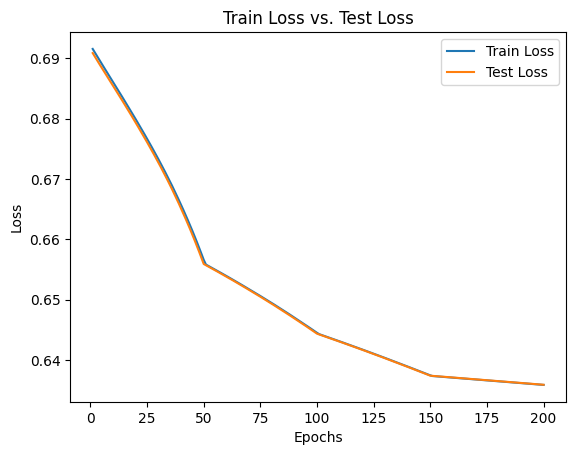

In [29]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.plot(epochs, test_loss1, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Adam

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Epoch 1/200
4/4 [==============================] - 2s 86ms/step - loss: 0.7261 - accuracy: 0.5598 - val_loss: 0.4206 - val_accuracy: 0.8153 - lr: 0.0050
Epoch 2/200
4/4 [==============================] - 0s 32ms/step - loss: 0.3507 - accuracy: 0.9070 - val_loss: 0.1531 - val_accuracy: 0.9273 - lr: 0.0050
Epoch 3/200
4/4 [==============================] - 0s 32ms/step - loss: 0.1122 - accuracy: 0.9547 - val_loss: 0.1319 - val_accuracy: 0.9707 - lr: 0.0050
Epoch 4/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0703 - accuracy: 0.9827 - val_loss: 0.0390 - val_accuracy: 0.9893 - lr: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 43ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0217 - val_accuracy: 0.9960 - lr: 0.0050
Epoch 6/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.0134 - val_accuracy: 0.9967 - lr: 0.0050
Epoch 7/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0080 - a

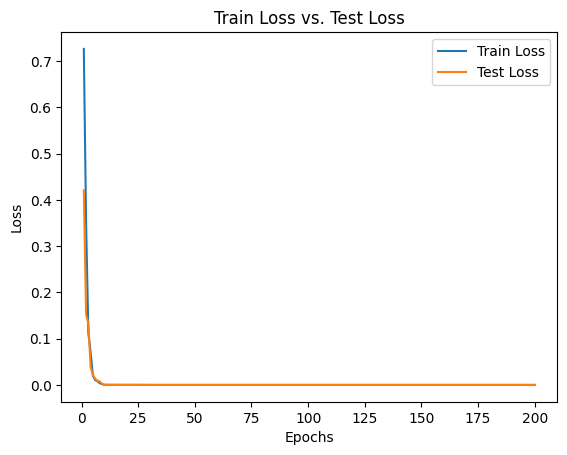

In [30]:
# Crie o modelo sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador RMSprop

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop)

Epoch 1/200
4/4 [==============================] - 1s 78ms/step - loss: 0.7503 - accuracy: 0.4908 - val_loss: 0.6870 - val_accuracy: 0.4813 - lr: 0.0050
Epoch 2/200
4/4 [==============================] - 0s 31ms/step - loss: 0.5736 - accuracy: 0.7217 - val_loss: 0.7350 - val_accuracy: 0.4813 - lr: 0.0050
Epoch 3/200
4/4 [==============================] - 0s 33ms/step - loss: 0.6422 - accuracy: 0.6292 - val_loss: 0.2920 - val_accuracy: 0.9187 - lr: 0.0050
Epoch 4/200
4/4 [==============================] - 0s 40ms/step - loss: 0.1874 - accuracy: 0.9355 - val_loss: 0.0657 - val_accuracy: 0.9787 - lr: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 34ms/step - loss: 0.0369 - accuracy: 0.9862 - val_loss: 0.0188 - val_accuracy: 0.9960 - lr: 0.0050
Epoch 6/200
4/4 [==============================] - 0s 32ms/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.0082 - val_accuracy: 0.9980 - lr: 0.0050
Epoch 7/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0044 - a

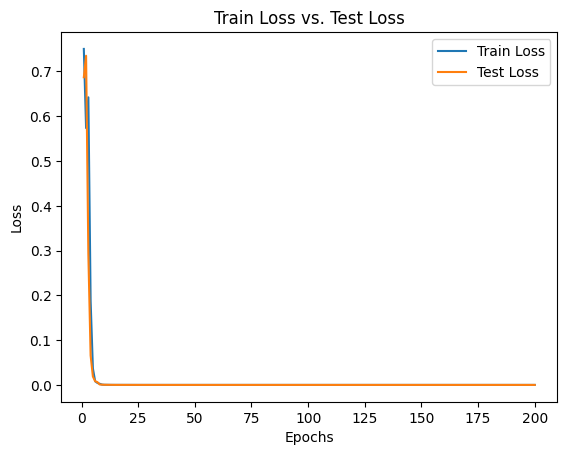

In [31]:
# Crie o modelo sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model3.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Adagrad

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adagrad)

Epoch 1/200
4/4 [==============================] - 1s 82ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6917 - val_accuracy: 0.5240 - lr: 0.0050
Epoch 2/200
4/4 [==============================] - 0s 34ms/step - loss: 0.6907 - accuracy: 0.5207 - val_loss: 0.6892 - val_accuracy: 0.5213 - lr: 0.0050
Epoch 3/200
4/4 [==============================] - 0s 31ms/step - loss: 0.6881 - accuracy: 0.5192 - val_loss: 0.6868 - val_accuracy: 0.5200 - lr: 0.0050
Epoch 4/200
4/4 [==============================] - 0s 31ms/step - loss: 0.6856 - accuracy: 0.5180 - val_loss: 0.6843 - val_accuracy: 0.5200 - lr: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 30ms/step - loss: 0.6831 - accuracy: 0.5180 - val_loss: 0.6819 - val_accuracy: 0.5200 - lr: 0.0050
Epoch 6/200
4/4 [==============================] - 0s 30ms/step - loss: 0.6806 - accuracy: 0.5183 - val_loss: 0.6793 - val_accuracy: 0.5193 - lr: 0.0050
Epoch 7/200
4/4 [==============================] - 0s 29ms/step - loss: 0.6780 - a

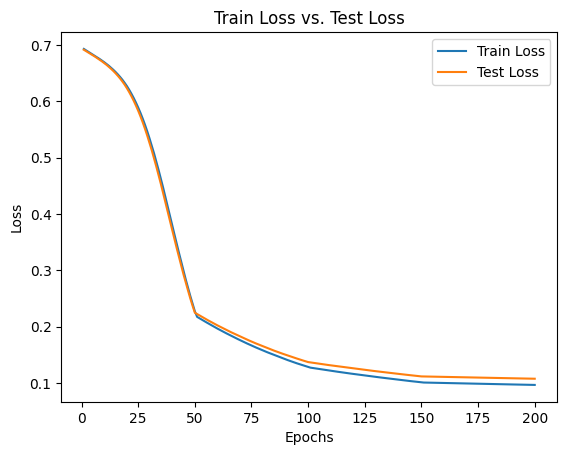

In [32]:
# Crie o modelo sequencial
model4 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model4.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model4.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss4) + 1)
plt.plot(epochs, train_loss4, label='Train Loss')
plt.plot(epochs, test_loss4, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Ada Delta

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adadelta)

Epoch 1/200
4/4 [==============================] - 1s 80ms/step - loss: 0.6954 - accuracy: 0.4643 - val_loss: 0.6948 - val_accuracy: 0.4660 - lr: 0.0050
Epoch 2/200
4/4 [==============================] - 0s 36ms/step - loss: 0.6950 - accuracy: 0.4712 - val_loss: 0.6944 - val_accuracy: 0.4713 - lr: 0.0050
Epoch 3/200
4/4 [==============================] - 0s 32ms/step - loss: 0.6945 - accuracy: 0.4800 - val_loss: 0.6940 - val_accuracy: 0.4833 - lr: 0.0050
Epoch 4/200
4/4 [==============================] - 0s 34ms/step - loss: 0.6941 - accuracy: 0.4882 - val_loss: 0.6936 - val_accuracy: 0.4853 - lr: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 32ms/step - loss: 0.6937 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.4893 - lr: 0.0050
Epoch 6/200
4/4 [==============================] - 0s 35ms/step - loss: 0.6933 - accuracy: 0.4993 - val_loss: 0.6928 - val_accuracy: 0.4947 - lr: 0.0050
Epoch 7/200
4/4 [==============================] - 0s 33ms/step - loss: 0.6929 - a

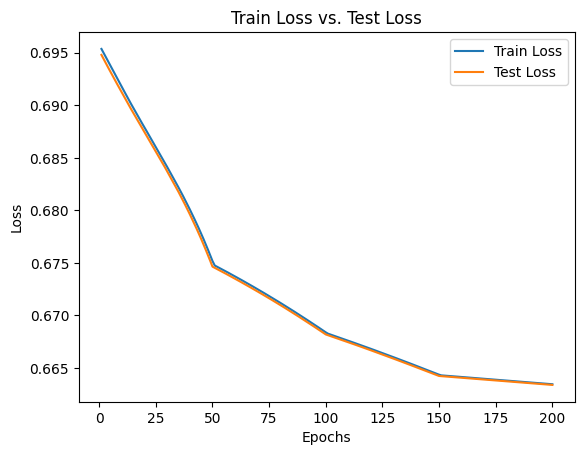

In [33]:
# Crie o modelo sequencial
model5 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model5.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model5.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history5 = model5.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss5) + 1)
plt.plot(epochs, train_loss5, label='Train Loss')
plt.plot(epochs, test_loss5, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: N Adam

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Nadam)

Epoch 1/200
4/4 [==============================] - 3s 88ms/step - loss: 0.7624 - accuracy: 0.5128 - val_loss: 0.6704 - val_accuracy: 0.9060 - lr: 0.0050
Epoch 2/200
4/4 [==============================] - 0s 35ms/step - loss: 0.4802 - accuracy: 0.9163 - val_loss: 0.7199 - val_accuracy: 0.7100 - lr: 0.0050
Epoch 3/200
4/4 [==============================] - 0s 34ms/step - loss: 1.0286 - accuracy: 0.7770 - val_loss: 0.0957 - val_accuracy: 0.9720 - lr: 0.0050
Epoch 4/200
4/4 [==============================] - 0s 38ms/step - loss: 0.0797 - accuracy: 0.9818 - val_loss: 0.0412 - val_accuracy: 0.9880 - lr: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0129 - val_accuracy: 0.9967 - lr: 0.0050
Epoch 6/200
4/4 [==============================] - 0s 32ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0087 - val_accuracy: 0.9980 - lr: 0.0050
Epoch 7/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0037 - a

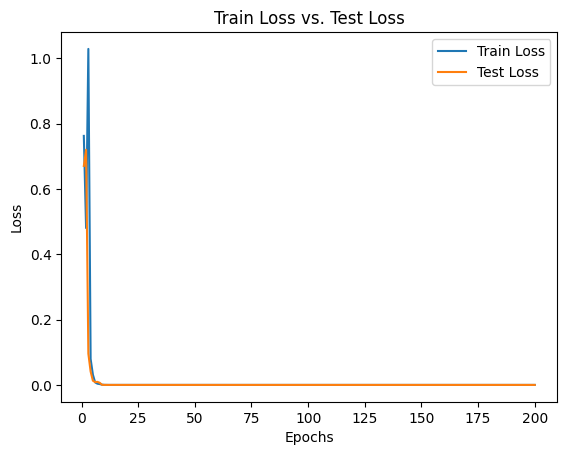

In [34]:
# Crie o modelo sequencial
model6 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model6.compile(optimizer=tf.keras.optimizers.Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

history6 = model6.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss6 = history6.history['loss']
test_loss6 = history6.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss6) + 1)
plt.plot(epochs, train_loss6, label='Train Loss')
plt.plot(epochs, test_loss6, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Avaliando os modelos

In [35]:
from sklearn.metrics import accuracy_score

### Gerando o CSV

In [36]:
transforma_bin = lambda x: 1 if x > 0.5 else 0

In [37]:
# print('SGD',accuracy_score(y_val, [transforma_bin(float(x)) for x in model1.predict(X_val)]))
# print('Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model2.predict(X_val)]))
# print('RMSProp',accuracy_score(y_val, [transforma_bin(float(x)) for x in model3.predict(X_val)]))
# print('Ada Grad',accuracy_score(y_val, [transforma_bin(float(x)) for x in model4.predict(X_val)]))
# print('Ada Delta',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
# print('N Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model6.predict(X_val)]))

In [38]:
print('Adam: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model2.predict(X_test)]))
print('Adam: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model2.predict(X_train)]))

47/47 [==============================] - 0s 1ms/step
Adam: teste 1.0
188/188 [==============================] - 0s 1ms/step
Adam: treino 1.0


In [39]:
# print('Ada Delta: validacao',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
# print('Ada Delta: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model5.predict(X_test)]))
# print('Ada Delta: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model5.predict(X_train)]))

### Gerando o CSV

In [40]:
len(X_val.columns)

90

In [41]:
len(X_test.columns)

90

In [42]:
len(X_train.columns)

90

In [43]:
colunas_diferentes = X_test.columns.difference(X_val.columns)

colunas_diferentes

Index([], dtype='object')

In [44]:
X_test.head()

,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,...,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1692,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4254,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1094,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5781,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4394,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
y_test.head()

1692    0.0
4254    1.0
1094    1.0
5781    0.0
4394    0.0
Name: class_p, dtype: float64

In [46]:
#Criando o DataFrame que Irá Armazenar os Resultados
result = pd.DataFrame(columns=['Modelo','Acurácia Treino','Acurácia Teste','Acurácia Validação'])

In [47]:
X_val.dtypes

cap-shape_f      float64
cap-shape_k      float64
cap-shape_s      float64
cap-shape_x      float64
cap-surface_s    float64
                  ...   
habitat_l        float64
habitat_m        float64
habitat_p        float64
habitat_u        float64
habitat_w        float64
Length: 90, dtype: object

In [48]:
y_pred = model1.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_1'] = y_pred


20/20 [==============================] - 0s 2ms/step


In [49]:
y_pred = model2.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_2'] = y_pred

20/20 [==============================] - 0s 2ms/step


In [50]:
y_pred = model3.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_3'] = y_pred

20/20 [==============================] - 0s 1ms/step


In [51]:
y_pred = model4.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_4'] = y_pred

20/20 [==============================] - 0s 2ms/step


In [52]:
y_pred = model5.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_5'] = y_pred

20/20 [==============================] - 0s 2ms/step


In [53]:
y_pred = model6.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_6'] = y_pred

20/20 [==============================] - 0s 1ms/step


In [55]:
result_export = result[['CLASS_MODELO_1', 'CLASS_MODELO_2', 'CLASS_MODELO_3', 'CLASS_MODELO_4', 'CLASS_MODELO_5', 'CLASS_MODELO_6']]

result_export.to_csv('Result/LARISSA_IONAFA_ROBERTA_YUMI.csv')